### <p style="text-align: right;"> &#9989; **Zach Parry** </p>
#### <p style="text-align: right;"> &#9989; Group 7</p>

# Day 21 In-Class Assignment: Principal Component Analysis (PCA)

<img src="http://lazyprogrammer.me/wp-content/uploads/2015/11/PCA.jpg" width="400"><a href="http://lazyprogrammer.me/tutorial-principal-components-analysis-pca//"><p style="text-align: right;">
Image from http://lazyprogrammer.me/
</p></a>

PCA Explained Visually: [http://setosa.io/ev/principal-component-analysis/](http://setosa.io/ev/principal-component-analysis/)


# Problem Description
In Machine Learning, a good "rule of thumb" is to have **more than 10 times the number of training samples as dimensions in your feature vector**.  So if your feature vector has 4 features, then you should have 40 samples for training (this doesn't count the samples for testing).

This is also called the "curse of dimensionality" and can sometimes be counter intuitive.  Basically we want more dimensions to ensure that we have captured the patterns we want to learn in the model. However, too many dimensions requires more training data. This can be a big problem when you have high dimensional data. 

For example, the face images provided by sci-kit learn, which we visited briefly at the end of the last class period and are using today in class, have 50 rows and 37 columns; **this results in a feature vector length of 1850**.  By the Machine Learning rule of thumb, we should have 18,500 examples in our training set (we only have at most 1560 examples and that does not include the ones we have set aside for testing. Many of you saw what happened when we ignored this rule!

In this assignment we are going to use Principal Component Analysis (PCA) to to reduce the size of our feature vector and only select features which are the "most" descriptive.

### Agenda for today's class

</p>

1. [Review of Principle Component Analysis (as introduced in the pre-class assignment)](#pca-review)
1. [Review of Face Recognition from last time](#review-faces)
1. [Feature Selection using Principal Component Analysis](#feature-select)
1. [Picking the best Feature Vectors](#best-features)
1. [Eigenfaces (just for fun -- and knowledge!)](#eigenfaces)

### Imports:

In [9]:
# imports for the day
import numpy as np
from sklearn.datasets import fetch_lfw_people
import matplotlib.pylab as plt
from ipywidgets import interact
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import pickle
import time
from sklearn.decomposition import PCA

---
<a id="pca-review"></a>
## 1. Review of Principle Component Analysis (as introduced in the pre-class assignment)

As a class, we'll spend a bit of time talk talking about how PCA works and why it might be useful for machine learning (as indicated by the "Problem Description" at the top of the notebook).

---
<a id="review-faces"></a>
## 2. Review of Face Recognition from last time

&#9989; For each of the following steps; run the code and discuss as a group what the code is doing.  **Look carefully at the results, is the model working well? Why/why not?**

First, lets download and view the data:

In [76]:
sk_data = fetch_lfw_people(min_faces_per_person=50, resize=0.4)

feature_vectors = sk_data.data
class_labels = sk_data.target
categories = sk_data.target_names
n_samples, n_features = feature_vectors.shape
N, h, w = sk_data.images.shape
n_classes = len(categories)

In [77]:
def browse_images(images, labels, categories):
    n = len(images)
    def view_image(i):
        plt.imshow(images[i], cmap=plt.cm.gray, interpolation='nearest')
        plt.title('%s' % categories[labels[i]])
        plt.axis('off')
        plt.show()
    interact(view_image, i=(0,n-1))
browse_images(sk_data.images, sk_data.target, sk_data.target_names)

interactive(children=(IntSlider(value=779, description='i', max=1559), Output()), _dom_classes=('widget-intera…

### Step 1: Splitting the dataset into training and testing sets

Make train and test datasets as before.

In [23]:
# put your answer here
train_vectors, test_vectors, train_labels, test_labels= train_test_split(feature_vectors,
                                                                       class_labels, test_size= .25, train_size= .75)


### Step 2: Train an SVM Classifier based on the training dataset.

As we learned in the last class, this training step can take a while (more than 5 minutes, depending on your computer).  To save some time, the instructors modified the code from last time to save the results of the training data to a file and have made this file available to you.  You can used the saved data by setting ```rerun_training``` to `False` or, if you want, you can redo the training step by setting ```rerun_training``` to `True`.

In [115]:
rerun_training = True
#filename = 'full_face_model.p'
filename2 = 'full_face_model.p'

In [116]:
# Train a SVM classification model  NOTE This can take ~ 5 minutes or more!!!!

#make some temporary variables so you can change this easily
tmp_vectors = pca_train_vectors
tmp_labels = train_labels

In [117]:
start = time.time()
if rerun_training:
    
    print("Fitting the classifier to the training set")
    param_grid = {'C': [1e3, 5e3, 1e4],
                  'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01]}
    clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, n_jobs=-1)
    clf = clf.fit(tmp_vectors, tmp_labels)
    print("Best estimator found by grid search:")
    print(clf.best_estimator_)

    #save the model to a file
    pickle.dump(clf, open(filename2, 'wb'))

else:
    #read the model from a file
    print("reading pickle file.")
    clf = pickle.load(open(filename2, 'rb'))
    print("Best estimator found by grid search:")
    print(clf.best_estimator_)
    
end = time.time()
print("Runtime",end - start)
    

Fitting the classifier to the training set
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.005)
Runtime 1.0067243576049805


&#9989; **Question**: What library and functions are used to save and load a python object in this example?  

<font size=+3>&#9998;</font> pickle.load and pickle.dump

### Step 3. Show the results of the classification on the testing dataset.

In [118]:
# Quantitative evaluation of the model quality on the test set

#make some temporary variables so you can change this easily
predict_vectors = pca_test_vectors
true_labels = test_labels

In [119]:
print("Predicting people's names on the test set")
pred_labels = clf.predict(predict_vectors)

print(classification_report(true_labels, pred_labels))
print(confusion_matrix(true_labels, pred_labels, labels=range(n_classes)))

Predicting people's names on the test set
              precision    recall  f1-score   support

           0       0.69      0.60      0.64        15
           1       0.68      0.84      0.75        45
           2       0.74      0.70      0.72        40
           3       0.89      0.94      0.91       133
           4       0.71      0.65      0.68        23
           5       0.92      0.80      0.86        15
           6       0.62      0.56      0.59         9
           7       0.93      0.72      0.81        18
           8       0.73      0.65      0.69        17
           9       0.85      0.79      0.81        14
          10       0.93      0.76      0.84        17
          11       0.86      0.86      0.86        44

    accuracy                           0.82       390
   macro avg       0.80      0.74      0.76       390
weighted avg       0.82      0.82      0.81       390

[[  9   2   2   1   0   0   0   0   0   0   1   0]
 [  2  38   1   1   1   0   0   0   1   

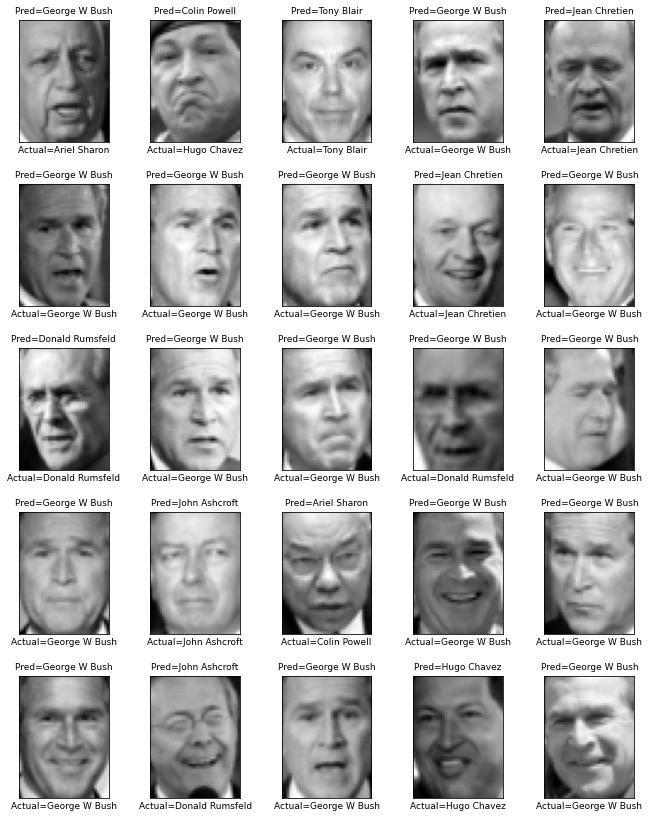

In [120]:
def plot_gallery(images, true_titles, pred_titles, h, w, n_row=5, n_col=5):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title('Pred='+str(categories[pred_titles[i]]), size=9)
        plt.xlabel('Actual='+str(categories[true_titles[i]]), size=9)
        plt.xticks(())
        plt.yticks(())

plot_gallery(test_vectors, test_labels, pred_labels, h,w)

&#9989; **Question**: How does the classifier do based on the parameters it found from the GridSearchCV? Why might this be the case?  

<font size=+3>&#9998;</font>Not very well it thinks everyone is george bush, not good enough speration of data, too many data points cross over.

----
<a id="feature-select"></a>
## 3. Feature Selection using Principal Component Analysis

Now we are going to go through the entire program above and use Principal Component Analysis (PCA) to select a much smaller set of better features.   The following code will reduce the original picture feature vector to a feature vector with 4 (n_components).  This is often called unsupervised feature extraction:

In [106]:
n_components = 77 # This is much less than the original n_features

print("Extracting the top %d eigenfaces from %d faces" % (n_components, train_vectors.shape[0]))

#Set up the pca object with the number of compoents we want to find
pca = PCA(n_components=n_components, whiten=True)

#Fit the training data to the pca model.
_ = pca.fit(train_vectors)

Extracting the top 77 eigenfaces from 1170 faces


We now have a ```pca``` object that has our data fit to it.  We can use this object to transform the original training vectors consisting of the entire image into new training vectors using the ```transform``` function:

In [107]:
pca_train_vectors = pca.transform(train_vectors)
pca_test_vectors = pca.transform(test_vectors)

print("Training set changed from a size of: ", train_vectors.shape, ' to: ', pca_train_vectors.shape)
print("Testing set changed from a size of: ", test_vectors.shape, ' to: ', pca_test_vectors.shape)

Training set changed from a size of:  (1170, 1850)  to:  (1170, 77)
Testing set changed from a size of:  (390, 1850)  to:  (390, 77)


&#9989; **Do This:** We have now reduced the size of our feature vectors.  Modify the code in **Section 2** to substitute these two new reduced size vectors for the full size vectors (or, if you find it easier, create a new cell and copy and paste the code from above).  This modification should replace both the training vectors and the testing vectors. Make sure you also consider the following:

* Recalculate the `clf` model and do not load it from memory -- **this is important!**
* You probably want to **change the filename so you do not overwrite the instructors file**
* Make sure your changes ensure that **the tmp_vectors and predict_vectors reference the new smaller vectors**

&#9989; **Question**:  What precision can the SVM algorithm achieve with only the first 4 feature vectors?  And how long did this take to run?

<font size=+3>&#9998;</font> Not very precise, took like 8 seconds

---
<a id="best-features"></a>
## 4. Picking the "best" Feature Vectors
If you remember from your pre-class assignment the PCA algorithm finds a transform of the data such that the first component contains the "most" information the second component contains the "second most" important information.  How much information each component contains is actually included in the ```pca``` object and can be expressed as a ratio from 0 (no information) to 1 (all information).  Lets plot these values below:

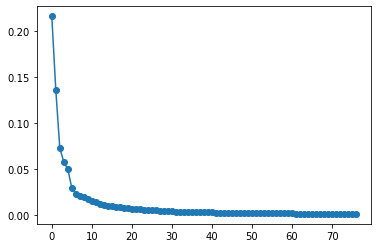

In [101]:
#Lets plot the variance of the eigen values
plt.plot(pca.explained_variance_ratio_, marker="o")

Another way to look at this is we can sum up the total ratios and see how much our new set of features represents the "variance" in the original data:

In [102]:
total_variance = np.sum(pca.explained_variance_ratio_)*100
print("These %d eigenvectors account for a total of %d percent of the total variance in the original dataset"
      % (n_components, total_variance))


These 77 eigenvectors account for a total of 90 percent of the total variance in the original dataset


&#9989; **Question:** How many components would we need to represent 90% of the variance in our original data? (Hint: modify **Section 3** and change n_components to find a total_variance > 90)

<font size=+3>&#9998;</font> 78

&#9989; **Do This:** generate a plot that generates a bar graph and compares the precision achieved of the following:
* original - The original image as a complete feature vector.
* 4 - The four "best" PCA components
* 90% - The components representing the top 90% of the PCA variance

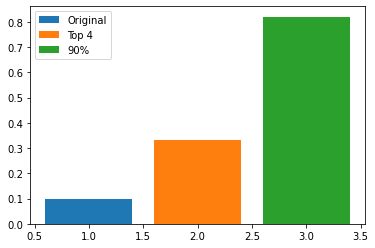

In [128]:
#Put your code here
x=[1,2,3]
vals=np.array([.1,.33,.82])

plt.bar(x[0],vals[0], label='Original')
plt.bar(x[1],vals[1], label='Top 4')
plt.bar(x[2],vals[2], label='90%')
plt.legend()


----
<a id="eigenfaces"></a>
## 5. Eigenfaces (just for fun and knowledge)

An eigenvector is a transform from the original image space into a new space along a single axis.  You can actually think of these vectors as a weighted sum of the components of an original image. So the length of the eigenvectors are the same size as the original data. Let's plot the gallery of the most significant eigenvectors:

In [104]:
eigenfaces = pca.components_.reshape((n_components, h, w))

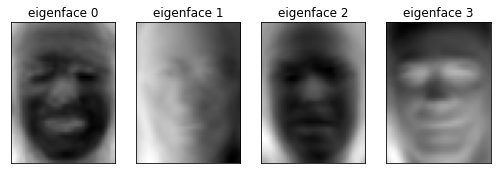

In [105]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=5):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w, n_row=1, n_col=4)

These vectors are often called eigenfaces.  Each image gives you information about where the greatest amount of variation occurs in the images. Some of the eigenfaces tell you more about the lighting in the image or about the orientation of the face and less about the actual facial features, but others highlight where the most variation is from face to face.

&#9989; **Do this:** Spend some time reflecting on the eigenfaces and see if you can make sense of what information of the original imagines might be captured by these eigenfaces. Talk with your group. If you're curious about what more of the eigenfaces look like, try change the values for `n_row` and `n_col` in the last line of the code cell above.

---
## 6. Got extra time left over? Let's inspect our choices for the GridSearchCV parameters

What parameters were used the `GridSearchCV` call? What values were found to produce the best fit? Is there anything concerning about the parameter ranges and the "best values"? What about the choice of kernel? Are there other kernels we could or should have tried?

&#9989; **Do This**: If you have extra time, consider changing some of the `GridSearchCV` parameters and see if your results change.

----

-----
### Congratulations, we're done!

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for today's submission folder (Don't forget to add your names in the first cell).


&#169; Copyright Michigan State University Board of Trustees